In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
import seaborn as sb


In [135]:
df=pd.read_csv('/content/drive/MyDrive/Guvi_Zen_class/train.csv')

In [136]:
df

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,cellular,17,nov,977,3,unknown,yes
45207,71,retired,divorced,primary,cellular,17,nov,456,2,unknown,yes
45208,72,retired,married,secondary,cellular,17,nov,1127,5,success,yes
45209,57,blue-collar,married,secondary,telephone,17,nov,508,4,unknown,no


In [137]:
#Missing values
#Duplicate drop
#Structured or not
#dtpes
#Outlier

In [138]:
#Data_Cleaning
df.isna().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

In [139]:
#Check dtypes
df.dtypes

age                int64
job               object
marital           object
education_qual    object
call_type         object
day                int64
mon               object
dur                int64
num_calls          int64
prev_outcome      object
y                 object
dtype: object

In [140]:
df['y']=df['y'].map({'yes':1,'no':0})

In [141]:
#Duplicates
df=df.drop_duplicates()
df

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,0
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,0
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,0
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,0
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,cellular,17,nov,977,3,unknown,1
45207,71,retired,divorced,primary,cellular,17,nov,456,2,unknown,1
45208,72,retired,married,secondary,cellular,17,nov,1127,5,success,1
45209,57,blue-collar,married,secondary,telephone,17,nov,508,4,unknown,0


In [142]:
#Structured or UnStructured
#Yes,Data is structured


In [143]:
#Outliers
col=['age','day','dur','num_calls']
for i in col:
  print(f"Features:{i}")
  iqr=df[i].quantile(0.75)-df[i].quantile(0.25)
  lower_bound=df[i].quantile(0.25)-(1.5*iqr)
  upper_bond=df[i].quantile(0.75)+(1.5*iqr)
  print(f"Lower_bond:{lower_bound},Upper_bond:{upper_bond}")
  df[i]=df[i].clip(lower_bound,upper_bond)
  print(df[i].describe())

Features:age
Lower_bond:10.5,Upper_bond:70.5
count    45205.000000
mean        40.869052
std         10.395247
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         70.500000
Name: age, dtype: float64
Features:day
Lower_bond:-11.5,Upper_bond:40.5
count    45205.00000
mean        15.80688
std          8.32234
min          1.00000
25%          8.00000
50%         16.00000
75%         21.00000
max         31.00000
Name: day, dtype: float64
Features:dur
Lower_bond:-221.0,Upper_bond:643.0
count    45205.00000
mean       234.95620
std        176.75476
min          0.00000
25%        103.00000
50%        180.00000
75%        319.00000
max        643.00000
Name: dur, dtype: float64
Features:num_calls
Lower_bond:-2.0,Upper_bond:6.0
count    45205.000000
mean         2.392235
std          1.600152
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: num_calls, dtype: float64


<ipython-input-143-2f7b36636962>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i]=df[i].clip(lower_bound,upper_bond)
<ipython-input-143-2f7b36636962>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i]=df[i].clip(lower_bound,upper_bond)
<ipython-input-143-2f7b36636962>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

#Exploratory_Data_Analysis

In [144]:
#age
df.age.dtypes

dtype('float64')

In [145]:
df.age.isna().sum()

0

In [146]:
df.age[0]

58.0

In [147]:
df.age.unique()

array([58. , 44. , 33. , 47. , 35. , 28. , 42. , 43. , 41. , 29. , 53. ,
       57. , 51. , 45. , 60. , 56. , 32. , 25. , 40. , 39. , 52. , 46. ,
       36. , 49. , 59. , 37. , 50. , 54. , 55. , 48. , 24. , 38. , 31. ,
       30. , 27. , 34. , 23. , 26. , 61. , 22. , 21. , 20. , 66. , 62. ,
       70.5, 67. , 70. , 65. , 68. , 64. , 69. , 19. , 63. , 18. ])

In [148]:
df.age.min()

18.0

In [149]:
df.age.max()

70.5

In [150]:
print(df.age.describe())

count    45205.000000
mean        40.869052
std         10.395247
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         70.500000
Name: age, dtype: float64


In [151]:
df.groupby('y')['age'].sum()

y
0    1628467.5
1     219018.0
Name: age, dtype: float64

<Axes: xlabel='y'>

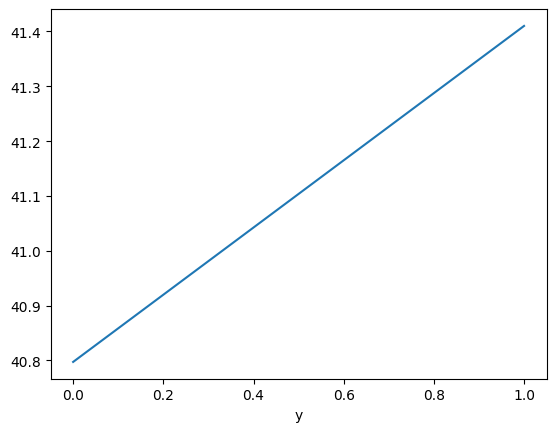

In [152]:
df.groupby('y')['age'].mean().plot()



From above analysis, it is clear age has an impact of Customer Conversion.
1)Age 40.8 has less possiblity of conversion
2)Age 41.8 has possiblity of conversion



In [153]:
#job
df.job.dtypes

dtype('O')

In [154]:
df.job[0]

'management'

In [155]:
df.job.unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [156]:
df.job.value_counts()

job
blue-collar      9730
management       9457
technician       7596
admin.           5170
services         4153
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64

In [157]:
job_user=df.groupby('job')['y'].mean().sort_values(ascending=False)
job_user

job
student          0.286780
retired          0.227915
unemployed       0.155027
management       0.137570
admin.           0.122050
self-employed    0.118429
unknown          0.118056
technician       0.110585
services         0.088851
housemaid        0.087903
entrepreneur     0.082717
blue-collar      0.072765
Name: y, dtype: float64

<Axes: xlabel='job'>

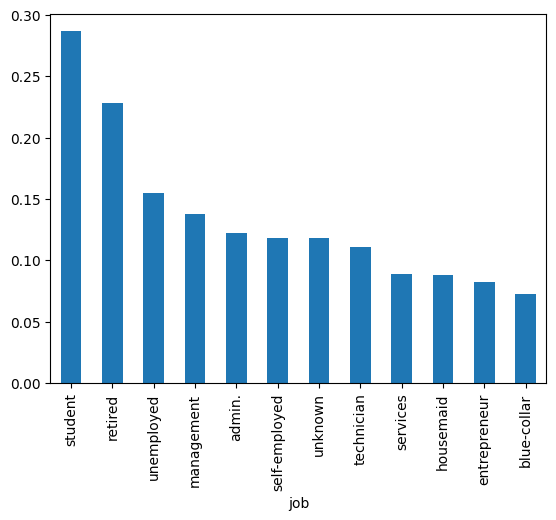

In [158]:
# prompt: need bar graph for job_user

job_user.plot.bar()


From Above graph ,it is clear that student,retired and unemployed has more chance of buying insurance

In [159]:

df["job"] = df["job"].map({"blue-collar":0,"entrepreneur":1,"housemaid":2,"services":3,
"technician":4,"unknown":5,"self-employed":6,"admin.":7,"management":8,"unemployed":9,
"retired":10,"student":11})


<ipython-input-159-fce382ddc187>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["job"] = df["job"].map({"blue-collar":0,"entrepreneur":1,"housemaid":2,"services":3,


In [160]:
df

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58.0,8,married,tertiary,unknown,5,may,261,1,unknown,0
1,44.0,4,single,secondary,unknown,5,may,151,1,unknown,0
2,33.0,1,married,secondary,unknown,5,may,76,1,unknown,0
3,47.0,0,married,unknown,unknown,5,may,92,1,unknown,0
4,33.0,5,single,unknown,unknown,5,may,198,1,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...
45206,51.0,4,married,tertiary,cellular,17,nov,643,3,unknown,1
45207,70.5,10,divorced,primary,cellular,17,nov,456,2,unknown,1
45208,70.5,10,married,secondary,cellular,17,nov,643,5,success,1
45209,57.0,0,married,secondary,telephone,17,nov,508,4,unknown,0


In [161]:
df.job.value_counts()

job
0     9730
8     9457
4     7596
7     5170
3     4153
10    2264
6     1579
1     1487
9     1303
2     1240
11     938
5      288
Name: count, dtype: int64

In [162]:
df.job.isna().sum()

0

In [163]:
#marital
df.marital.dtypes

dtype('O')

In [164]:
df.marital[0]

'married'

In [165]:
df.marital.unique()

array(['married', 'single', 'divorced'], dtype=object)

In [166]:
df.marital.value_counts()

marital
married     27210
single      12788
divorced     5207
Name: count, dtype: int64

In [167]:
marital_status=df.groupby('marital')['y'].mean().sort_values(ascending=False)
marital_status

marital
single      0.149515
divorced    0.119455
married     0.101250
Name: y, dtype: float64

<Axes: xlabel='marital'>

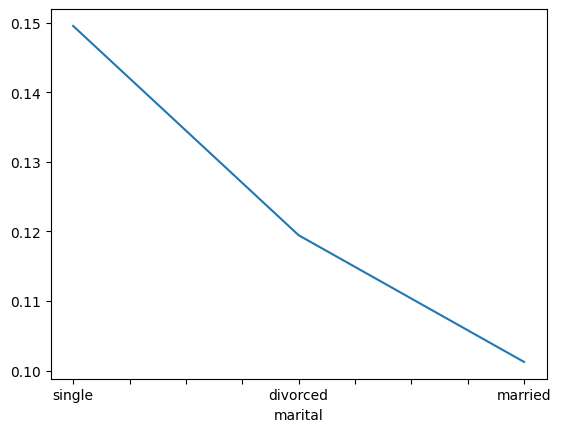

In [168]:
marital_status.plot(y='y')

From above visualization it is very clear singles are more likely to buy insurance

In [169]:
df['marital']=df['marital'].map({'single':2,'divorced':1,'married':0})

<ipython-input-169-76efa4d75f10>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['marital']=df['marital'].map({'single':2,'divorced':1,'married':0})


In [170]:
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y'],
      dtype='object')

In [171]:
#education_qual
df.education_qual.dtypes

dtype('O')

In [172]:
df.education_qual.unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [173]:
df.education_qual.value_counts()

education_qual
secondary    23199
tertiary     13299
primary       6850
unknown       1857
Name: count, dtype: int64

In [174]:
educatonal_qual=df.groupby('education_qual')['y'].mean().sort_values(ascending=False)
educatonal_qual

education_qual
tertiary     0.150086
unknown      0.135703
secondary    0.105608
primary      0.086277
Name: y, dtype: float64

<Axes: xlabel='education_qual'>

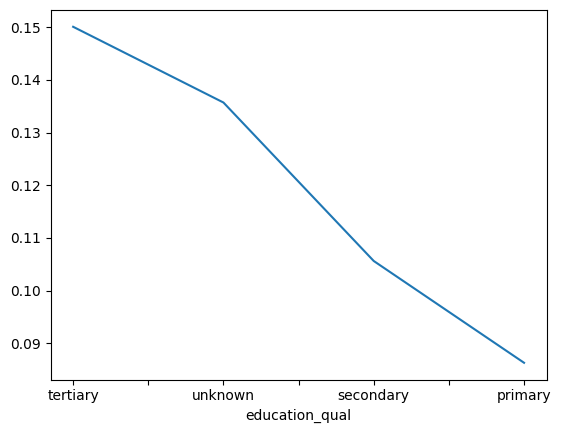

In [175]:
educatonal_qual.plot(y='y')

From above plot it is clear tertiary people who are educated has an more possiblity of buying insurance

In [176]:
df['education_qual']=df['education_qual'].map({'tertiary':3,'unknown':2,'secondary':1,'primary':0})

<ipython-input-176-b7b4d92fe7ba>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['education_qual']=df['education_qual'].map({'tertiary':3,'unknown':2,'secondary':1,'primary':0})


In [177]:
df

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58.0,8,0,3,unknown,5,may,261,1,unknown,0
1,44.0,4,2,1,unknown,5,may,151,1,unknown,0
2,33.0,1,0,1,unknown,5,may,76,1,unknown,0
3,47.0,0,0,2,unknown,5,may,92,1,unknown,0
4,33.0,5,2,2,unknown,5,may,198,1,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...
45206,51.0,4,0,3,cellular,17,nov,643,3,unknown,1
45207,70.5,10,1,0,cellular,17,nov,456,2,unknown,1
45208,70.5,10,0,1,cellular,17,nov,643,5,success,1
45209,57.0,0,0,1,telephone,17,nov,508,4,unknown,0


In [178]:
#Call_type
df.call_type.dtypes

dtype('O')

In [179]:
df.call_type.unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

In [180]:
df.call_type.value_counts()

call_type
cellular     29282
unknown      13017
telephone     2906
Name: count, dtype: int64

In [181]:
call_type=df.groupby('call_type')['y'].mean().sort_values(ascending=False)
call_type

call_type
cellular     0.149204
telephone    0.134205
unknown      0.040716
Name: y, dtype: float64

<Axes: xlabel='call_type'>

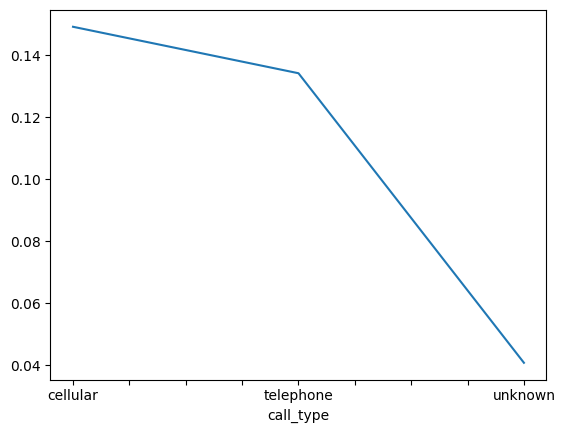

In [182]:
call_type.plot(y='y')

From the above visualization, it is clear that the caller type "cellular" has a significant impact on the conversion of customers to buy insurance.

In [183]:
df['call_type']=df['call_type'].map({'cellular':2,'telephone':1,'unknown':0})

<ipython-input-183-f4b2d6ac3f61>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['call_type']=df['call_type'].map({'cellular':2,'telephone':1,'unknown':0})


In [184]:
df

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58.0,8,0,3,0,5,may,261,1,unknown,0
1,44.0,4,2,1,0,5,may,151,1,unknown,0
2,33.0,1,0,1,0,5,may,76,1,unknown,0
3,47.0,0,0,2,0,5,may,92,1,unknown,0
4,33.0,5,2,2,0,5,may,198,1,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...
45206,51.0,4,0,3,2,17,nov,643,3,unknown,1
45207,70.5,10,1,0,2,17,nov,456,2,unknown,1
45208,70.5,10,0,1,2,17,nov,643,5,success,1
45209,57.0,0,0,1,1,17,nov,508,4,unknown,0


In [185]:
#day
df.day.dtypes

dtype('int64')

In [186]:
df.day[0]

5

In [187]:
df.day.unique()

array([ 5,  6,  7,  8,  9, 12, 13, 14, 15, 16, 19, 20, 21, 23, 26, 27, 28,
       29, 30,  2,  3,  4, 11, 17, 18, 24, 25,  1, 10, 22, 31])

In [188]:
df.day.min()

1

In [189]:
df.day.max()

31

In [190]:
print(df.day.describe())

count    45205.00000
mean        15.80688
std          8.32234
min          1.00000
25%          8.00000
50%         16.00000
75%         21.00000
max         31.00000
Name: day, dtype: float64


In [191]:
df.groupby('y')['day'].sum()

y
0    634378
1     80172
Name: day, dtype: int64

In [192]:
df.groupby('y')['day'].mean()

y
0    15.892825
1    15.158253
Name: day, dtype: float64

<Axes: xlabel='y'>

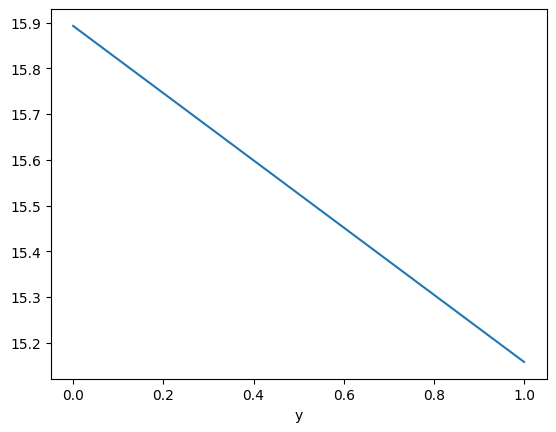

In [193]:
df.groupby('y')['day'].mean().plot()

From the above graph,it is clear that there is high possiblity of buying insurance at start of the month

In [194]:
df

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58.0,8,0,3,0,5,may,261,1,unknown,0
1,44.0,4,2,1,0,5,may,151,1,unknown,0
2,33.0,1,0,1,0,5,may,76,1,unknown,0
3,47.0,0,0,2,0,5,may,92,1,unknown,0
4,33.0,5,2,2,0,5,may,198,1,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...
45206,51.0,4,0,3,2,17,nov,643,3,unknown,1
45207,70.5,10,1,0,2,17,nov,456,2,unknown,1
45208,70.5,10,0,1,2,17,nov,643,5,success,1
45209,57.0,0,0,1,1,17,nov,508,4,unknown,0


In [195]:
#mon
df.mon.dtypes

dtype('O')

In [196]:
df.mon[0]

'may'

In [197]:
df.mon.unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [198]:
df.mon.value_counts()

mon
may    13765
jul     6894
aug     6245
jun     5339
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: count, dtype: int64

In [199]:
mon_cal=df.groupby('mon')['y'].mean().sort_values(ascending=False)
mon_cal

mon
mar    0.519916
dec    0.467290
sep    0.464594
oct    0.437669
apr    0.196794
feb    0.166478
aug    0.110168
jun    0.102266
nov    0.101511
jan    0.101212
jul    0.090949
may    0.067199
Name: y, dtype: float64

<Axes: xlabel='mon'>

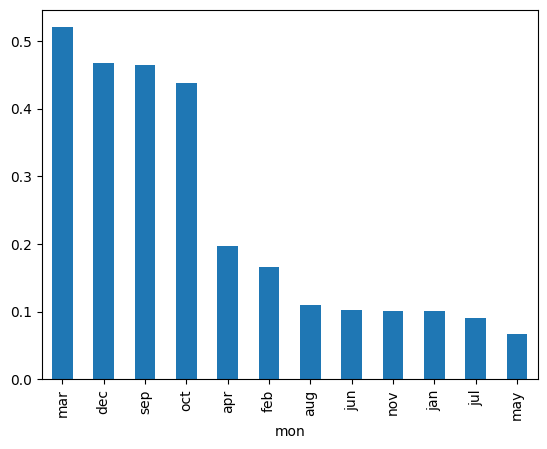

In [200]:
# prompt: need bar graph for job_user

mon_cal.plot.bar()


From the above bar graph, we can clearly see that during month of the march,december and september people likely to buy insurance

In [201]:
df['mon']=df['mon'].map({'mar':11,'dec':10,'sep':9,'oct':8,'apr':7,'feb':6,'aug':5,'jun':4,'nov':3,'jan':2,'jul':1,'may':0})

<ipython-input-201-8143ef181349>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mon']=df['mon'].map({'mar':11,'dec':10,'sep':9,'oct':8,'apr':7,'feb':6,'aug':5,'jun':4,'nov':3,'jan':2,'jul':1,'may':0})


In [202]:
df

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58.0,8,0,3,0,5,0,261,1,unknown,0
1,44.0,4,2,1,0,5,0,151,1,unknown,0
2,33.0,1,0,1,0,5,0,76,1,unknown,0
3,47.0,0,0,2,0,5,0,92,1,unknown,0
4,33.0,5,2,2,0,5,0,198,1,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...
45206,51.0,4,0,3,2,17,3,643,3,unknown,1
45207,70.5,10,1,0,2,17,3,456,2,unknown,1
45208,70.5,10,0,1,2,17,3,643,5,success,1
45209,57.0,0,0,1,1,17,3,508,4,unknown,0


In [203]:
#dur
df.dur.dtypes

dtype('int64')

In [204]:
df.dur.isna().sum()

0

In [205]:
df.dur.unique()

array([261, 151,  76,  92, 198, 139, 217, 380,  50,  55, 222, 137, 517,
        71, 174, 353,  98,  38, 219,  54, 262, 164, 160, 342, 181, 172,
       296, 127, 255, 348, 225, 230, 208, 226, 336, 242, 365, 643, 577,
       180,  22, 616, 355, 363, 266, 253, 179, 145, 104,  13, 185, 138,
       391, 357,  91, 528, 273, 158, 177, 258, 154, 291, 176, 211, 349,
       272, 193, 212,  20, 246, 529, 188,  48, 213, 583, 221, 173, 426,
       287, 101, 203, 197, 257, 124, 229, 400, 190,  21, 514, 194, 144,
       286, 107, 247, 518, 364, 178, 439,  79, 120, 175,  61,  78, 143,
       579, 345, 100, 125, 136,  73, 541, 163, 301,  46, 204, 157, 243,
       186, 610,  85, 114,  57, 238,  93, 128, 303, 558, 270, 228,  99,
       240, 233, 250, 252, 130, 412,  19, 458, 313, 416, 146, 167, 315,
       140, 346, 562, 142,  67, 309, 248, 256,  82, 477, 611, 471, 381,
        42, 251, 408, 215, 216, 366, 210, 288, 168, 338, 410, 300,  27,
        18, 121,  40, 206, 389, 117, 232,  39, 282, 227, 119, 36

In [206]:
df.dur.min()

0

In [207]:
df.dur.max()

643

In [208]:
print(df.dur.describe())

count    45205.00000
mean       234.95620
std        176.75476
min          0.00000
25%        103.00000
50%        180.00000
75%        319.00000
max        643.00000
Name: dur, dtype: float64


In [209]:
df.groupby('y')['dur'].sum()

y
0    8375269
1    2245926
Name: dur, dtype: int64

In [210]:
df.groupby('y')['dur'].mean()

y
0    209.822352
1    424.640953
Name: dur, dtype: float64

<Axes: xlabel='y'>

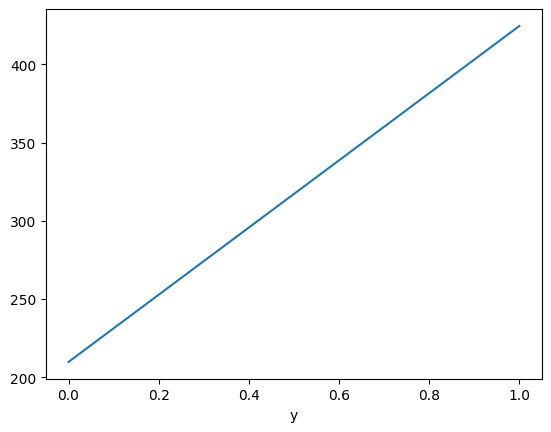

In [211]:
df.groupby('y')['dur'].mean().plot()

From above plot,it is clear more likely the people buy the insurance if call duration is high

In [212]:
df

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58.0,8,0,3,0,5,0,261,1,unknown,0
1,44.0,4,2,1,0,5,0,151,1,unknown,0
2,33.0,1,0,1,0,5,0,76,1,unknown,0
3,47.0,0,0,2,0,5,0,92,1,unknown,0
4,33.0,5,2,2,0,5,0,198,1,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...
45206,51.0,4,0,3,2,17,3,643,3,unknown,1
45207,70.5,10,1,0,2,17,3,456,2,unknown,1
45208,70.5,10,0,1,2,17,3,643,5,success,1
45209,57.0,0,0,1,1,17,3,508,4,unknown,0


In [213]:
#num_calls
df.num_calls.dtypes

dtype('int64')

In [214]:
df.num_calls.isna().sum()

0

In [215]:
df.num_calls.unique()

array([1, 2, 3, 5, 4, 6])

In [216]:
df.num_calls.min()

1

In [217]:
df.num_calls.max()

6

In [218]:
print(df.num_calls.describe())

count    45205.000000
mean         2.392235
std          1.600152
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: num_calls, dtype: float64


In [219]:
df.groupby('y')['num_calls'].sum()

y
0    97443
1    10698
Name: num_calls, dtype: int64

In [220]:
df.groupby('y')['num_calls'].mean()

y
0    2.441202
1    2.022689
Name: num_calls, dtype: float64

<Axes: xlabel='y'>

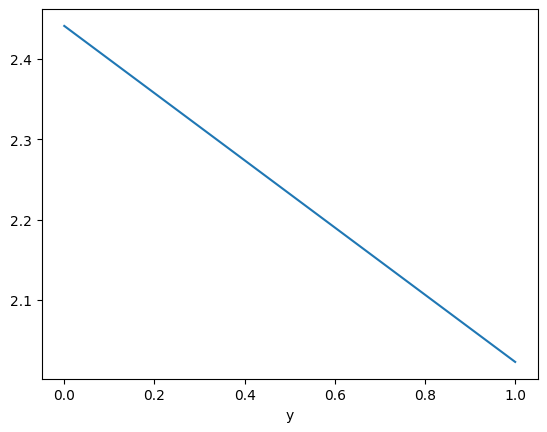

In [221]:
df.groupby('y')['num_calls'].mean().plot()

From the plot,it is clear less number of call likely to buy insurance

In [222]:
df

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58.0,8,0,3,0,5,0,261,1,unknown,0
1,44.0,4,2,1,0,5,0,151,1,unknown,0
2,33.0,1,0,1,0,5,0,76,1,unknown,0
3,47.0,0,0,2,0,5,0,92,1,unknown,0
4,33.0,5,2,2,0,5,0,198,1,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...
45206,51.0,4,0,3,2,17,3,643,3,unknown,1
45207,70.5,10,1,0,2,17,3,456,2,unknown,1
45208,70.5,10,0,1,2,17,3,643,5,success,1
45209,57.0,0,0,1,1,17,3,508,4,unknown,0


In [223]:
#prev_outcome
df.prev_outcome.dtypes

dtype('O')

In [224]:
df.prev_outcome.isna().sum()

0

In [225]:
df.prev_outcome.unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [226]:
df.prev_outcome.value_counts()

prev_outcome
unknown    36953
failure     4901
other       1840
success     1511
Name: count, dtype: int64

In [227]:
prev_out=df.groupby('prev_outcome')['y'].mean().sort_values(ascending=False)
prev_out

prev_outcome
success    0.647253
other      0.166848
failure    0.126097
unknown    0.091630
Name: y, dtype: float64

<Axes: xlabel='prev_outcome'>

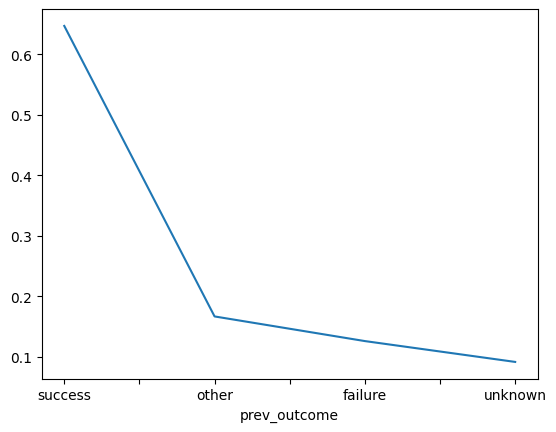

In [228]:
# prompt: need bar graph for job_user

prev_out.plot()


From above graph,it is clear that if prev outcome more likely to get insurance

In [229]:
df['prev_outcome']=df['prev_outcome'].map({'success':3,'other':2,'failure':1,'unknown':0})

<ipython-input-229-d4a2ff2c483b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['prev_outcome']=df['prev_outcome'].map({'success':3,'other':2,'failure':1,'unknown':0})


In [230]:
df

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58.0,8,0,3,0,5,0,261,1,0,0
1,44.0,4,2,1,0,5,0,151,1,0,0
2,33.0,1,0,1,0,5,0,76,1,0,0
3,47.0,0,0,2,0,5,0,92,1,0,0
4,33.0,5,2,2,0,5,0,198,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
45206,51.0,4,0,3,2,17,3,643,3,0,1
45207,70.5,10,1,0,2,17,3,456,2,0,1
45208,70.5,10,0,1,2,17,3,643,5,3,1
45209,57.0,0,0,1,1,17,3,508,4,0,0


In [231]:
#y
df.y.dtypes

dtype('int64')

In [232]:
df.y.isna().sum()

0

In [233]:
df.y.unique()

array([0, 1])

In [234]:
df.y.value_counts()

y
0    39916
1     5289
Name: count, dtype: int64

In [235]:
#Task Jar
#Supervised Learing--->Classification model--->Binary classification

In [236]:
#Check for balanced data
df['y'].value_counts()/len(df)

y
0    0.883
1    0.117
Name: count, dtype: float64

In [237]:
df.isna().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

In [238]:
# prompt: split code
from sklearn.model_selection import train_test_split

x = df.drop('y', axis=1)
y = df['y']
# Split the resampled data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=7)



In [239]:
#Data is imbalanced,Balancing it using SMOTENN
#Balancing using ENN(Under_sampling and Over_sampling)
from imblearn.combine import SMOTEENN
smoteenn=SMOTEENN(random_state=7)
x_train_cc,y_train_cc=smoteenn.fit_resample(x_train,y_train)


In [240]:
#Check for balanced data
y_train_cc.value_counts()/len(y_train_cc)

y
1    0.561032
0    0.438968
Name: count, dtype: float64

In [241]:
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y'],
      dtype='object')

In [242]:
df

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58.0,8,0,3,0,5,0,261,1,0,0
1,44.0,4,2,1,0,5,0,151,1,0,0
2,33.0,1,0,1,0,5,0,76,1,0,0
3,47.0,0,0,2,0,5,0,92,1,0,0
4,33.0,5,2,2,0,5,0,198,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
45206,51.0,4,0,3,2,17,3,643,3,0,1
45207,70.5,10,1,0,2,17,3,456,2,0,1
45208,70.5,10,0,1,2,17,3,643,5,3,1
45209,57.0,0,0,1,1,17,3,508,4,0,0


##Scale

In [243]:
#SCALE
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
scale.fit(x_train_cc)
x_train_cc=scale.transform(x_train_cc)
x_test=scale.transform(x_test)

##Model

In [244]:
#Logistic_Regression_MODEL
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train_cc,y_train_cc)
model.predict(x_test)

array([0, 1, 1, ..., 0, 0, 1])

In [245]:
model.coef_,model.intercept_

(array([[-0.03102429,  0.52377598,  0.01089157, -0.0640274 ,  0.40104814,
         -0.08880329,  1.11400015,  2.63908392, -0.72741072,  0.63460072]]),
 array([0.60909688]))

In [246]:
model.predict(x_test), y_test

(array([0, 1, 1, ..., 0, 0, 1]),
 20466    0
 41471    0
 39423    0
 19736    0
 13716    0
         ..
 6268     0
 43625    0
 23897    0
 17560    0
 16239    0
 Name: y, Length: 9041, dtype: int64)

In [247]:
model.score(x_test,y_test)

0.749585222873576

In [248]:
from sklearn.metrics import f1_score
f1_score(y_test,model.predict(x_test),pos_label=0)

0.8379152348224513

In [249]:
# Get the coefficients of the logistic regression model
coefficients = model.coef_[0]

# Create a DataFrame with feature names and coefficients
feature_importances_df = pd.DataFrame({'feature': x.columns, 'importance': coefficients})

# Sort the DataFrame by absolute value of importance
feature_importances_df['importance_abs'] = feature_importances_df['importance'].abs()
feature_importances_df = feature_importances_df.sort_values(by='importance_abs', ascending=False)

# Print the top 5 most important features
print(feature_importances_df.head(5))

        feature  importance  importance_abs
7           dur    2.639084        2.639084
6           mon    1.114000        1.114000
8     num_calls   -0.727411        0.727411
9  prev_outcome    0.634601        0.634601
1           job    0.523776        0.523776


In [250]:
#DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(x_train_cc,y_train_cc)
model.predict(x_test)


array([0, 1, 0, ..., 0, 0, 0])

In [251]:
model.predict(x_test)

array([0, 1, 0, ..., 0, 0, 0])

In [252]:
#Evaluation
model.score(x_test,y_test)

0.8339785421966597

In [253]:
#Using F1 score
from sklearn.metrics import f1_score
f1_score(y_test,model.predict(x_test),pos_label=0)

0.8998598972579891

In [254]:
df

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58.0,8,0,3,0,5,0,261,1,0,0
1,44.0,4,2,1,0,5,0,151,1,0,0
2,33.0,1,0,1,0,5,0,76,1,0,0
3,47.0,0,0,2,0,5,0,92,1,0,0
4,33.0,5,2,2,0,5,0,198,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
45206,51.0,4,0,3,2,17,3,643,3,0,1
45207,70.5,10,1,0,2,17,3,456,2,0,1
45208,70.5,10,0,1,2,17,3,643,5,3,1
45209,57.0,0,0,1,1,17,3,508,4,0,0


In [255]:
# prompt: feature_importances = pd.DataFrame(zip(df.drop['y'], model.feature_importances_), columns = ['feature', 'score'])
# feature_importances.sort_values(by = 'score', ascending = False)

import pandas as pd
feature_importances = pd.DataFrame(zip(df.drop('y', axis=1), model.feature_importances_), columns=['feature', 'score'])
feature_importances.sort_values(by='score', ascending=False)


,feature,score
7,dur,0.474529
6,mon,0.155391
4,call_type,0.087350
5,day,0.080960
0,age,0.071665
9,prev_outcome,0.041260
1,job,0.040873
8,num_calls,0.027571
3,education_qual,0.011689
2,marital,0.008712


In [256]:
from sklearn.model_selection import cross_val_score
for depth in [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40]:
  #print(f"Depth:{depth}")
  model=DecisionTreeClassifier(max_depth=depth)
  model.fit(x_train_cc,y_train_cc)
  train_score=model.score(x_test,y_test)
  cross_val=np.mean(cross_val_score(model,x_train_cc,y_train_cc,cv=10))
  print(f"Depth :{depth},cross_val_score:{cross_val},train_score:{train_score}")

Depth :1,cross_val_score:0.7803974906021555,train_score:0.6373188806547948
Depth :2,cross_val_score:0.7971484000891553,train_score:0.5712863621280831
Depth :3,cross_val_score:0.8504239587721326,train_score:0.6594403273974118
Depth :4,cross_val_score:0.8579073724102809,train_score:0.6877557792279615
Depth :5,cross_val_score:0.8734387233755363,train_score:0.7374184271651366
Depth :6,cross_val_score:0.8811770963481431,train_score:0.6864284924234045
Depth :7,cross_val_score:0.8941227688447814,train_score:0.7898462559451388
Depth :8,cross_val_score:0.9095992529192619,train_score:0.7985842274084726
Depth :9,cross_val_score:0.9206149480587689,train_score:0.8032297312244221
Depth :10,cross_val_score:0.9240562874897789,train_score:0.8028979095232828
Depth :11,cross_val_score:0.9286263361871276,train_score:0.792722044021679
Depth :12,cross_val_score:0.9307021821721321,train_score:0.8110828448180512
Depth :13,cross_val_score:0.9369291532930276,train_score:0.8155071341665745
Depth :14,cross_val_sc

In [257]:
#DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=40)
model.fit(x_train_cc, y_train_cc)
model.predict(x_test)
#Using F1 score
from sklearn.metrics import f1_score
f1_score(y_test,model.predict(x_test),pos_label=0)


0.8996996996996997

In [258]:
#Evaluation
model.score(x_test,y_test)

0.8337573277292335

In [259]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier
model = RandomForestClassifier()

# Train the model on the training data
model.fit(x_train_cc, y_train_cc)

# Make predictions on the test data
predictions = model.predict(x_test)

# Evaluate the model's accuracy
accuracy = model.score(x_test, y_test)

# Print the accuracy
print("Accuracy:", accuracy)

# Evaluate the model's F1 score
f1_score = f1_score(y_test, predictions,pos_label=0)

# Print the F1 score
print("F1 Score:", f1_score)



Accuracy: 0.843601371529698
F1 Score: 0.9049475665501479


In [260]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(max_depth = 3, max_features = "sqrt")

for n in [100, 200, 500, 1000,1100,1200,1300]:
  model = RandomForestClassifier(n_estimators = n, max_depth = 3, max_features = "sqrt")
  cross_score = np.mean(cross_val_score(model, x_train_cc, y_train_cc, cv = 10))
  print(f"N: {n}, Cross-Val Score: {cross_score}")

N: 100, Cross-Val Score: 0.8675393227081438
N: 200, Cross-Val Score: 0.8648992314790102
N: 500, Cross-Val Score: 0.8662646818323632
N: 1000, Cross-Val Score: 0.865226808562152
N: 1100, Cross-Val Score: 0.8660098119980286
N: 1200, Cross-Val Score: 0.866100833624043
N: 1300, Cross-Val Score: 0.866228291744946


In [261]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score #Import the f1_score function

model = RandomForestClassifier(n_estimators = 1300, max_depth = 3, max_features = "sqrt")
model.fit(x_train_cc, y_train_cc)
print(f"Test data accuracy : {model.score(x_test, y_test)}, F1-Score: {f1_score(model.predict(x_test), y_test,pos_label=0)}") # Call the imported f1_score function

Test data accuracy : 0.6969361796261475, F1-Score: 0.7956443914081145


In [262]:
# Get the feature importances
importances = model.feature_importances_

# Create a DataFrame of feature importances
feature_importances = pd.DataFrame(zip(df.drop('y', axis=1), importances), columns=['feature', 'importance'])

# Sort the DataFrame by importance
feature_importances.sort_values(by='importance', ascending=False)


,feature,importance
7,dur,0.558151
4,call_type,0.146296
6,mon,0.124146
8,num_calls,0.075091
9,prev_outcome,0.043134
1,job,0.028479
0,age,0.016477
5,day,0.006859
3,education_qual,0.001202
2,marital,0.000166


In [263]:
from xgboost import XGBClassifier

for lamb in [0.001, 0.05, 0.1, 0.2,0.21,0.23,0.25,0.27,0.28,0.3,0.4]:
  model = XGBClassifier(learning_rate = lamb)
  cross_score = np.mean(cross_val_score(model, x_train_cc, y_train_cc, cv = 10))
  print(f"Lambda: {lamb}, Cross-Val Score: {cross_score}")

Lambda: 0.001, Cross-Val Score: 0.561032007365794
Lambda: 0.05, Cross-Val Score: 0.9355270775000799
Lambda: 0.1, Cross-Val Score: 0.9499296926804413
Lambda: 0.2, Cross-Val Score: 0.9608729291825961
Lambda: 0.21, Cross-Val Score: 0.9614374827049298
Lambda: 0.23, Cross-Val Score: 0.9627483379826991
Lambda: 0.25, Cross-Val Score: 0.9644234620795933
Lambda: 0.27, Cross-Val Score: 0.9644053134433561
Lambda: 0.28, Cross-Val Score: 0.9648241176713155
Lambda: 0.3, Cross-Val Score: 0.9658255312429022
Lambda: 0.4, Cross-Val Score: 0.9678283882194503


In [264]:
model = XGBClassifier(learning_rate = 0.21)
model.fit(x_train_cc, y_train_cc)
print(f"Test data accuracy : {model.score(x_test, y_test)}, F1-Score: {f1_score(model.predict(x_test), y_test,pos_label=0)}")


Test data accuracy : 0.8534454153301626, F1-Score: 0.9117666644469602


In [265]:
# prompt: find feature importance of XGBClassifier

import pandas as pd
importances = model.feature_importances_

# Create a DataFrame of feature importances
feature_importances = pd.DataFrame(zip(df.drop('y', axis=1), importances), columns=['feature', 'importance'])

# Sort the DataFrame by importance
feature_importances.sort_values(by='importance', ascending=False)


,feature,importance
7,dur,0.210604
4,call_type,0.204366
6,mon,0.154835
9,prev_outcome,0.147319
8,num_calls,0.075195
1,job,0.050173
3,education_qual,0.044643
0,age,0.043845
5,day,0.041702
2,marital,0.027316


In [269]:
import pandas as pd

# Get feature importances from the trained model
importances = model.feature_importances_

# Create a DataFrame with feature names and importances
feature_importances_df = pd.DataFrame({'feature': df.drop('y', axis=1).columns, 'importance': importances})

# Sort the DataFrame by absolute value of importance
feature_importances_df['importance_abs'] = feature_importances_df['importance'].abs()
feature_importances_df = feature_importances_df.sort_values(by='importance_abs', ascending=False)
feature_importances=pd.DataFrame(feature_importances_df)
# Print the top 5 most important features
feature_importances

,feature,importance,importance_abs
7,dur,0.210604,0.210604
4,call_type,0.204366,0.204366
6,mon,0.154835,0.154835
9,prev_outcome,0.147319,0.147319
8,num_calls,0.075195,0.075195
1,job,0.050173,0.050173
3,education_qual,0.044643,0.044643
0,age,0.043845,0.043845
5,day,0.041702,0.041702
2,marital,0.027316,0.027316
